In [1]:
from __future__ import annotations

from typing import List, Optional, Tuple, Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

import models.elec_motor_model as elecmotmod
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=18)


In [2]:
def abbrange(letter: str, a: int, b: int) -> Tuple[str]:
    return (f"{letter}{i:02}" for i in range(a, b))

In [3]:
d_abbrs = (*abbrange("D", 1, 7), "D09", "D11", "D12", "D13", "D14", "D16", *abbrange("D", 18, 23))
m_abbrs = abbrange("M", 1, 8)
r_abbrs = ("R02", "R03", "R09")
s_abbrs = (*abbrange("S", 1, 11), "S21", "S22", "S23", "S28", "S29", "S30", "S31")

abbrs = (
    *d_abbrs,
    *m_abbrs,
    # *p_abbrs,
    *r_abbrs,
    *s_abbrs,
    # *t_abbrs,
)
colors = u.COLORS
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

def add_terrain_legend(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure], highlighted: Optional[List[str]] = None):
    legend_handles = [mpatches.Patch(color=col, label=lab) for lab, col in colors.items()]
    if highlighted is not None:
        legend_handles.extend([mpatches.Patch(color="xkcd:bright red", label=lab) for lab in highlighted])
    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    mpl_elem.legend(
        handles=legend_handles, ncol=len(colors), bbox_to_anchor=(0.5, -0.03), loc="upper center", title="Terrain"
    )

In [4]:
dfs = {}
for abbr in abbrs:
    print(abbr)
    preprocess(abbr, verbose=False)
    emm_df = elecmotmod.emm_main(abbr, verbose=False)
    dfs[abbr] = emm_df
multidf = pd.concat([dfs[abbr] for abbr in abbrs], ignore_index=True)
multidf.meta = dfs[abbrs[0]].meta
multidf.meta.abbr = "Multi"

D01
D02
D03
D04
D05
D06
D09
D11
D12
D13
D14
D16
D18
D19
D20
D21
D22
M01
M02
M03
M04
M05
M06
M07
R02
R03
R09
S01
S02
S03
S04
S05
S06
S07
S08
S09
S10
S21
S22
S23
S28
S29
S30
S31


In [5]:
print(len(abbrs))
for abbr in abbrs:
    print(u.get_filename(abbr))

44
D01_2020-10-08-15-32-10-TF-boreal01_elec
D02_2020-10-09-09-03-28-TF-boreal02_elec
D03_2020-11-11-15-04-17-VC-deposit01_elec
D04_2020-11-11-15-12-46-VC-deposit02_elec
D05_2021-01-18-10-36-09-SG-grandaxe_elec
D06_2021-02-22-15-43-34-SF-boreal01_elec
D09_2022-02-23-16-34-49-SG-theodolite_elec
D11_2020-AP-crv2020train_elec
D12_2020-AP-crv2020valid_elec
D13_2020-SF-crv2020train_elec
D14_2020-SF-crv2020valid_elec
D16_2020-11-05-13-15-14-VG-GrandAxeOdometry_elec
D18_2022-08-10-13-38-28-VG-GrandAxeGrassTrail01_elec
D19_2022-08-10-13-45-44-VG-GrandAxeGrassTrail02_elec
D20_2022-08-10-13-53-23-VG-GrandAxe100Associes_elec
D21_2022-08-10-14-00-53-VG-GrandAxePentzerLike_elec
D22_2022-08-10-14-22-06-AD-DesjardinsParking01_elec
M01_2022-09-14-19-01-10-AP-LinParking01_elec
M02_2022-09-14-19-05-20-AP-LinParking02_elec
M03_2022-09-14-19-09-59-AP-RotParkingCCW01_elec
M04_2022-09-14-19-13-56-AP-RotParkingCW02_elec
M05_2022-09-12-15-14-00-GD-RotDumpCCW01_elec
M06_2022-09-12-15-16-51-GD-RotDumpCCW02_elec


In [6]:
model_name = elecmotmod.__MODEL_NAME__.lower()
figdir = u.get_figdir("summary", subdir=f"{model_name}-warthog")
model_name = elecmotmod.__MODEL_NAME__.title()
cmap = plt.get_cmap("turbo")

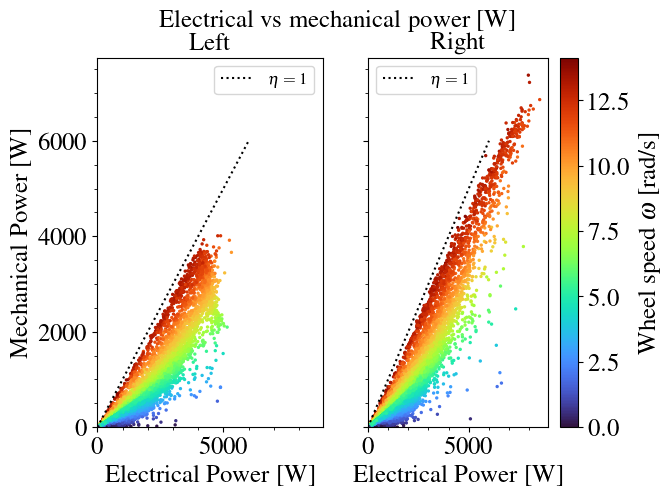

In [32]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, sharex=True)

norm = plt.Normalize(
    vmin=0,
    vmax=max(
        multidf.wL.abs().max(),
        multidf.wR.abs().max(),
    ),
)

ax1.scatter(multidf.PE_L.abs(), multidf.PM_L.abs(), c=multidf.wL.abs(), norm=norm, cmap=cmap, s=2)
ax2.scatter(multidf.PE_R.abs(), multidf.PM_R.abs(), c=multidf.wR.abs(), norm=norm, cmap=cmap, s=2)

ax1.plot([0, 6000], [0, 6000], ":k", label="$\\eta=1$")
ax2.plot([0, 6000], [0, 6000], ":k", label="$\\eta=1$")

ax1.legend(fontsize=12)
ax2.legend(fontsize=12)

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax2)
clb.ax.set_ylabel("Wheel speed $\\omega$ [rad/s]")

# for abbr in abbrs:
#     df = dfs[abbr]
#     ax1.scatter(df.PE_L.abs(), df.PM_L.abs(), alpha=0.2, s=2)
#     ax2.scatter(df.PE_R.abs(), df.PM_R.abs(), alpha=0.2, s=2)

ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

ax1.set_xlabel("Electrical Power [W]")
ax1.set_ylabel("Mechanical Power [W]")
ax1.set_title("Left")

ax2.set_xlabel("Electrical Power [W]")
ax2.set_title("Right")


fig.suptitle("Electrical vs mechanical power [W]")
fig.savefig(figdir / f"{model_name}_power.jpg", bbox_inches="tight")


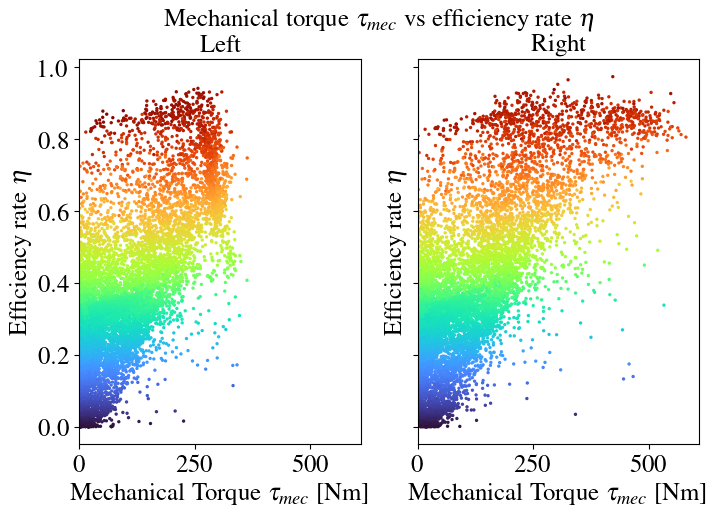

In [22]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(8, 5))

ax1.scatter(multidf.TL.abs(), multidf.eta_L.abs(), c=multidf.wL.abs(), cmap=cmap, s=2)
ax2.scatter(multidf.TR.abs(), multidf.eta_R.abs(), c=multidf.wR.abs(), cmap=cmap, s=2)

ax1.set_xlim(left=0)
ax1.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax1.set_ylabel("Efficiency rate $\eta$")
ax1.set_title("Left")

ax2.set_xlim(left=0)
ax2.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax2.set_ylabel("Efficiency rate $\eta$")
ax2.set_title("Right")

fig.suptitle("Mechanical torque $\\tau_{{mec}}$ vs efficiency rate $\\eta$")

fig.savefig(figdir / f"{model_name}_torque-efficiency-abs.jpg", bbox_inches="tight")


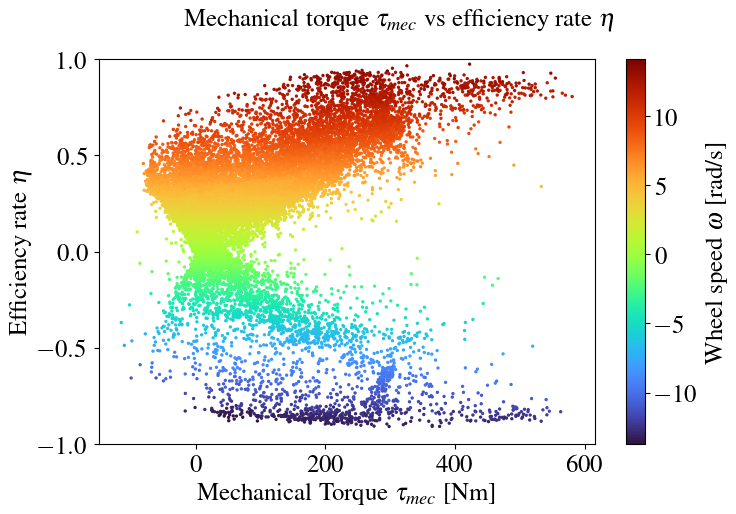

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))

norm = plt.Normalize(
    vmin=min(
        multidf.wL.min(),
        multidf.wR.min(),
    ),
    vmax=max(
        multidf.wL.max(),
        multidf.wR.max(),
    ),
)

ax.scatter(multidf.TL, multidf.eta_L, c=multidf.wL, norm=norm, cmap=cmap, s=2)
ax.scatter(multidf.TR, multidf.eta_R, c=multidf.wR, norm=norm, cmap=cmap, s=2)

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
clb.ax.set_ylabel("Wheel speed $\\omega$ [rad/s]")

# ax.set_xlim(left=0)
ax.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax.set_ylabel("Efficiency rate $\eta$")

ax.set_ylim(bottom=-1, top=1)

fig.suptitle("Mechanical torque $\\tau_{{mec}}$ vs efficiency rate $\\eta$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_torque-efficiency.{ext}", bbox_inches="tight")


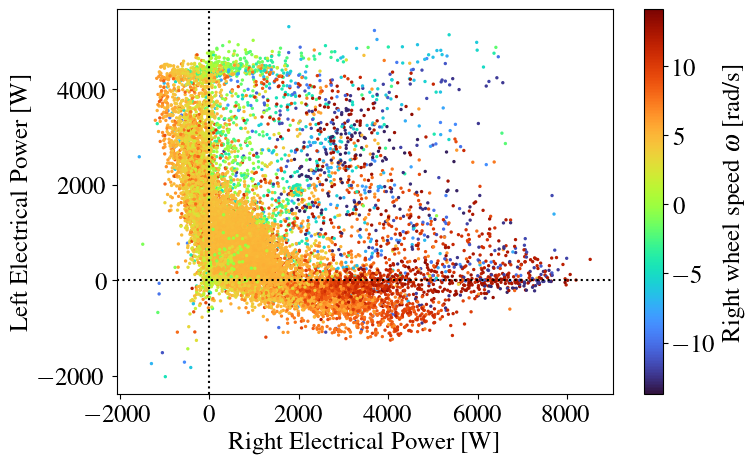

In [44]:
fig, ax = plt.subplots(figsize=(8, 5))
norm = plt.Normalize(
    vmin=min(
        multidf.wL.min(),
        multidf.wR.min(),
    ),
    vmax=max(
        multidf.wL.max(),
        multidf.wR.max(),
    ),
)
ax.scatter(multidf.PE_R, multidf.PE_L, c=multidf.wR, norm=norm, cmap=cmap, s=2)
ax.axhline(y=0, linestyle=":", color="k", label="${PE}_{L}=0$")
ax.axvline(x=0, linestyle=":", color="k", label="${PE}_{R}=0$")

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
clb.ax.set_ylabel("Right wheel speed $\\omega$ [rad/s]")

ax.set_ylabel("Left Electrical Power [W]")
ax.set_xlabel("Right Electrical Power [W]")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}-power-differential.{ext}", bbox_inches="tight")

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

norm = plt.Normalize(
    vmin=min(
        multidf.wL.abs().min(),
        multidf.wR.abs().min(),
    ),
    vmax=max(
        multidf.wL.abs().max(),
        multidf.wR.abs().max(),
    ),
)

ax.scatter(multidf.TL, multidf.eta_L, c=multidf.wL.abs(), norm=norm, cmap=cmap, s=2)
ax.scatter(multidf.TR, multidf.eta_R, c=multidf.wR.abs(), norm=norm, cmap=cmap, s=2)

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
clb.ax.set_ylabel("Wheel speed $\\omega$ [rad/s]")

# ax.set_xlim(left=0)
ax.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax.set_ylabel("Efficiency rate $\eta$")

fig.suptitle("Mechanical torque $\\tau_{{mec}}$ vs efficiency rate $\\eta$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_torque-efficiency.{ext}", bbox_inches="tight")

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))

norm = plt.Normalize(
    vmin=min(
        multidf.wL.min(),
        multidf.wR.min(),
    ),
    vmax=max(
        multidf.wL.max(),
        multidf.wR.max(),
    ),
)

ax.scatter(multidf.TL, multidf.V_L, c=multidf.wL, norm=norm, cmap=cmap, s=2)
ax.scatter(multidf.TR, multidf.V_R, c=multidf.wR, norm=norm, cmap=cmap, s=2)

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
clb.ax.set_ylabel("Wheel speed $\\omega$ [rad/s]")

# ax.set_xlim(left=0)
ax.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax.set_ylabel("Voltage $V$ [V]")

fig.suptitle("Mechanical torque $\\tau_{{mec}}$ vs voltage $V$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_torque-voltage.{ext}", bbox_inches="tight")

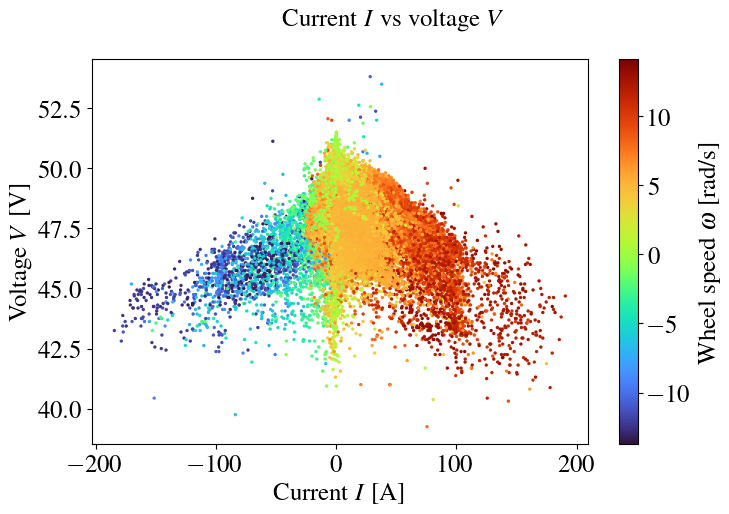

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))

norm = plt.Normalize(
    vmin=min(
        multidf.wL.min(),
        multidf.wR.min(),
    ),
    vmax=max(
        multidf.wL.max(),
        multidf.wR.max(),
    ),
)

ax.scatter(multidf.Imot_L, multidf.V_L, c=multidf.wL, norm=norm, cmap=cmap, s=2)
ax.scatter(multidf.Imot_R, multidf.V_R, c=multidf.wR, norm=norm, cmap=cmap, s=2)

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
clb.ax.set_ylabel("Wheel speed $\\omega$ [rad/s]")

# ax.set_xlim(left=0)
ax.set_xlabel("Current $I$ [A]")
ax.set_ylabel("Voltage $V$ [V]")

fig.suptitle("Current $I$ vs voltage $V$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_current-voltage.{ext}", bbox_inches="tight")

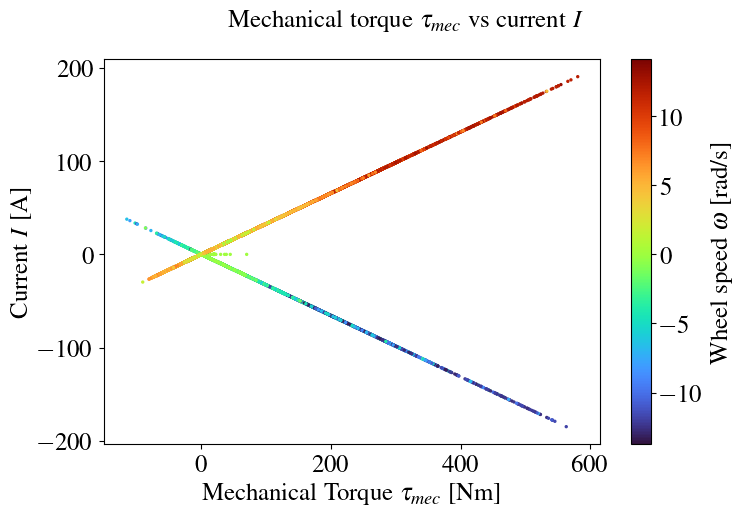

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))

norm = plt.Normalize(
    vmin=min(
        multidf.wL.min(),
        multidf.wR.min(),
    ),
    vmax=max(
        multidf.wL.max(),
        multidf.wR.max(),
    ),
)

ax.scatter(multidf.TL, multidf.Imot_L, c=multidf.wL, norm=norm, cmap=cmap, s=2)
ax.scatter(multidf.TR, multidf.Imot_R, c=multidf.wR, norm=norm, cmap=cmap, s=2)

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
clb.ax.set_ylabel("Wheel speed $\\omega$ [rad/s]")

# ax.set_xlim(left=0)
ax.set_xlabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")
ax.set_ylabel("Current $I$ [A]")

fig.suptitle("Mechanical torque $\\tau_{{mec}}$ vs current $I$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_torque-current.{ext}", bbox_inches="tight")

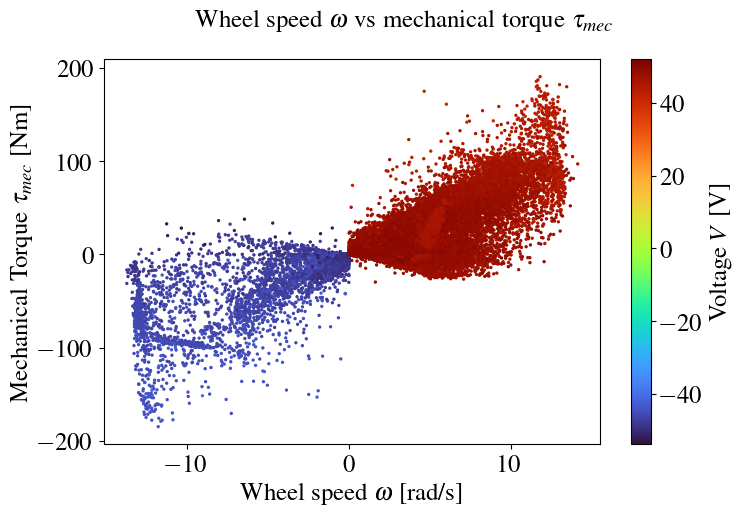

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))

norm = plt.Normalize(
    vmin=min(
        multidf.Vmot_L.min(),
        multidf.Vmot_R.min(),
    ),
    vmax=max(
        multidf.Vmot_L.max(),
        multidf.Vmot_R.max(),
    ),
)

ax.scatter(multidf.wL, multidf.Imot_L, c=multidf.Vmot_L, norm=norm, cmap=cmap, s=2)
ax.scatter(multidf.wR, multidf.Imot_R, c=multidf.Vmot_R, norm=norm, cmap=cmap, s=2)

clb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
clb.ax.set_ylabel("Voltage $V$ [V]")

# ax.set_xlim(left=0)
ax.set_xlabel("Wheel speed $\\omega$ [rad/s]")
ax.set_ylabel("Mechanical Torque $\\tau_{{mec}}$ [Nm]")

fig.suptitle("Wheel speed $\\omega$ vs mechanical torque $\\tau_{{mec}}$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_speed-torque.{ext}", bbox_inches="tight")

AttributeError: 'DataFrame' object has no attribute 'Emot_L'

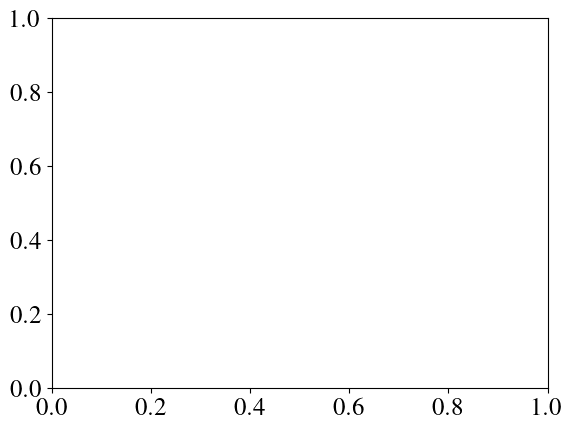

In [15]:
fig, ax = plt.subplots()

dVL = (multidf.Vmot_L - multidf.Emot_L) / multidf.meta.motor_R
dVR = (multidf.Vmot_R - multidf.Emot_R) / multidf.meta.motor_R

# dVL.plot(ax=ax)
import numpy as np
ImotL = multidf.I_L * np.sign(dVL) / multidf.meta.motor_R
ImotR = multidf.I_R * np.sign(dVR) / multidf.meta.motor_R

ax.scatter(multidf.wL, ImotL, s=2)
ax.scatter(multidf.wR, ImotR, s=2)
# multidf.I_L.plot(ax=ax)

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=2, sharex=True)

ax1.scatter(multidf.wL, multidf.Vmot_L, label="$V_{{mot}}$", s=2)
ax1.scatter(multidf.wL, multidf.Emot_L, label="$E_{{mot}}$", s=2)
ax1.legend()
ax2.scatter(multidf.wR, multidf.Vmot_R, label="$V_{{mot}}$", s=2)
ax2.scatter(multidf.wR, multidf.Emot_R, label="$E_{{mot}}$", s=2)
ax2.legend()

AttributeError: 'DataFrame' object has no attribute 'Emot_L'